In [107]:
import numpy as np
import tensorflow as tf
import pygame
import random
import matplotlib.pyplot as plt

In [108]:
# %reset -f


In [109]:
import os
import numpy as np

# Define the directory containing .npy files
directory = 'data'

# Get a list of all .npy files in the directory
npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

data = []

# Load each .npy file and store the array in the dictionary
for npy_file in npy_files:
    file_path = os.path.join(directory, npy_file)
    data.append(np.load(file_path))





In [110]:
data = np.array(data)

C:\Users\surya\AppData\Local\Temp\ipykernel_32892\4012140830.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [111]:
# plt.imshow(data[0][0].reshape((28,28)))
data[0].shape

(151623, 784)

In [112]:
label_str = ['Airplane', 'Alarm Clock', 'Apple', 'Axe', 'Baseball bat', 'Bat','Bucket']

for i in range(data.shape[0]):
    label = np.full((data[i].shape[0],1),i)
    data[i] = np.concatenate((data[i],label),axis=1)

data[0].shape

(151623, 785)

In [114]:
labelled_data = np.vstack((data[0][0:int(0.1*data[0].shape[0]),:],data[1][0:int(0.1*data[1].shape[0]),:],data[2][0:int(0.1*data[2].shape[0]),:], data[3][0:int(0.1*data[3].shape[0]),:], data[4][0:int(0.1*data[4].shape[0]),:], data[5][0:int(0.1*data[5].shape[0]),:], data[6][0:int(0.1*data[6].shape[0]),:]))
labelled_data.shape 

(90982, 785)

In [140]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import keras_tuner
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Input,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import regularizers



In [271]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# data_arr = np.array(df_merged_new)
# data_arr = np.array(data_new)
np.random.shuffle(labelled_data)
X = labelled_data[:,0:-1]
y = labelled_data[:,-1]

# max(X[:,2])
y

array([4, 1, 5, ..., 4, 0, 5])

In [323]:
import pandas as pd
pd.DataFrame(y)
np.min(y)

0

In [365]:
X = X/255

In [366]:
cnn = models.Sequential([
    layers.InputLayer(shape=(28,28,1)),
    layers.Conv2D(filters=15, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=1),
    # layers.Conv2D(filters=20, kernel_size=(3,3), activation='relu'),
    # layers.MaxPool2D(pool_size=(2,2),strides=1),
    layers.Flatten(),
    layers.Dense(60,activation='relu'),
    layers.Dense(7,activation='softmax')
])

In [367]:
cnn.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 15)     │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 25, 25, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 9375)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 60)             │       562,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 7)              │           427 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 563,137 (2.15 MB)

 Trainable params: 563,137 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [368]:
cnn.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [369]:
X = X.reshape(-1,28,28)
X = np.expand_dims(X,axis=3)

In [370]:
X.shape

(90982, 28, 28, 1)

In [394]:
# X[0,:,:]
# X[0]

4


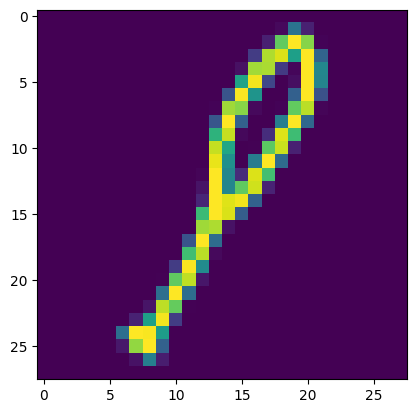

In [372]:
plt.imshow(X[0,:,:])
print(y[0])

In [373]:
# %reset -f

In [374]:
# from keras.callbacks import EarlyStopping

# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=300)
history = cnn.fit(X,y,batch_size=250,epochs=20,validation_split=0.2,shuffle=True)


Epoch 1/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8045 - loss: 0.5842 - val_accuracy: 0.9112 - val_loss: 0.2807
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9229 - loss: 0.2406 - val_accuracy: 0.9229 - val_loss: 0.2455
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9409 - loss: 0.1831 - val_accuracy: 0.9258 - val_loss: 0.2443
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9529 - loss: 0.1450 - val_accuracy: 0.9216 - val_loss: 0.2567
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9613 - loss: 0.1206 - val_accuracy: 0.9245 - val_loss: 0.2785
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9709 - loss: 0.0928 - val_accuracy: 0.9209 - val_loss: 0.3055
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9762 - loss: 0.0737 - val_accuracy: 0.9204 - val_loss: 0.3408
Epoch 8/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9813 - loss: 0.0571 - val_acc

In [425]:
# cnn.predict(np.expand_dims(X[1],axis=0))

In [424]:
# y[1]

In [439]:

pygame.init()


width, height = 640, 480
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Draw Something")

BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

canvas = pygame.Surface(window.get_size())
canvas.fill(BLACK)

# Run the drawing loop
running = True
drawing = False

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False

    if drawing:
        mouse_pos = pygame.mouse.get_pos()
        pygame.draw.circle(canvas, WHITE, mouse_pos, 5)

    # Draw the canvas on the window
    window.blit(canvas, (0, 0))
    pygame.display.flip()

pygame.quit()

# Save the canvas as an image file
pygame.image.save(canvas, "drawing3.png")


In [440]:
from PIL import Image
image = Image.open("drawing3.png").convert("L")  # Convert to grayscale


image_resized = image.resize((28, 28), Image.LANCZOS)
image_array = np.array(image_resized)
image_array = image_array / 255.0
# image_array = image_array.reshape((28,28))

In [441]:
image_array.shape

(28, 28)

In [442]:
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
image_array.shape
# image_array

(1, 28, 28, 1)

In [443]:
# y[1]
# np.squeeze(image_array)
# inverted_image_array = 1 - image_array

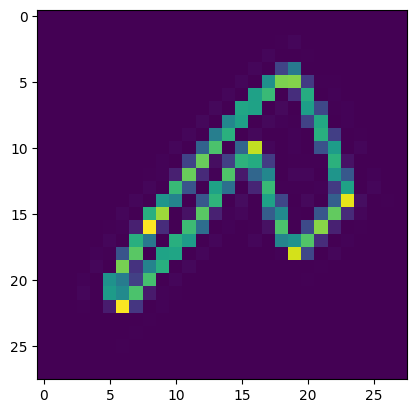

In [444]:
image_to_show = np.squeeze(image_array)

plt.imshow(image_to_show)

In [445]:
# print(image_array.shape)
prediction = cnn.predict(image_array)
print(label_str[np.argmax(prediction)])
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Axe
[[2.3402774e-10 6.5188952e-09 3.4741542e-04 9.9898332e-01 6.6900370e-04
  2.8305732e-07 9.7549135e-10]]
